# Time Series Image Comparison

## Imports

In [1]:
import pandas as pd
import geopandas as gpd

from blackmarble import BlackMarble, Product
from conflict_monitoring_ntl.satellites import SDGSat, EnMAP
from conflict_monitoring_ntl.viz import plot_xarray_time_comparison

## Retrieving Images

Get Images from Lagos between 22nd and 28th Dec 2024 for:
- **Black Marble**: using `blackmarblepy` Python SDK;
- **SDGSat-1**: from local filesystem.

In [2]:
# get the ESRI shape file and set date interval
gdf: gpd.GeoDataFrame = gpd.read_file("../../data/shapes/lagos/lagos.shp")
date_range = pd.date_range(start="2024-12-21", end="2024-12-28", freq="D").date.tolist()

In [ ]:
# SDGSat
sdgsat = SDGSat()
sdgsat_df = sdgsat.raster(gdf, date_range)

In [ ]:
# Black Marble
bm = BlackMarble()
bm_df = bm.raster(
    gdf,
    product_id=Product.VNP46A2,
    date_range=date_range
)

In [6]:
# EnMAP
enmap = EnMAP()
enmap_df = enmap.raster(gdf, date_range)

2025-09-26 17:21:01,676 - conflict_monitoring_ntl.logging - WARNING - [EnMAP] No images for given region and date range.


## Visualize

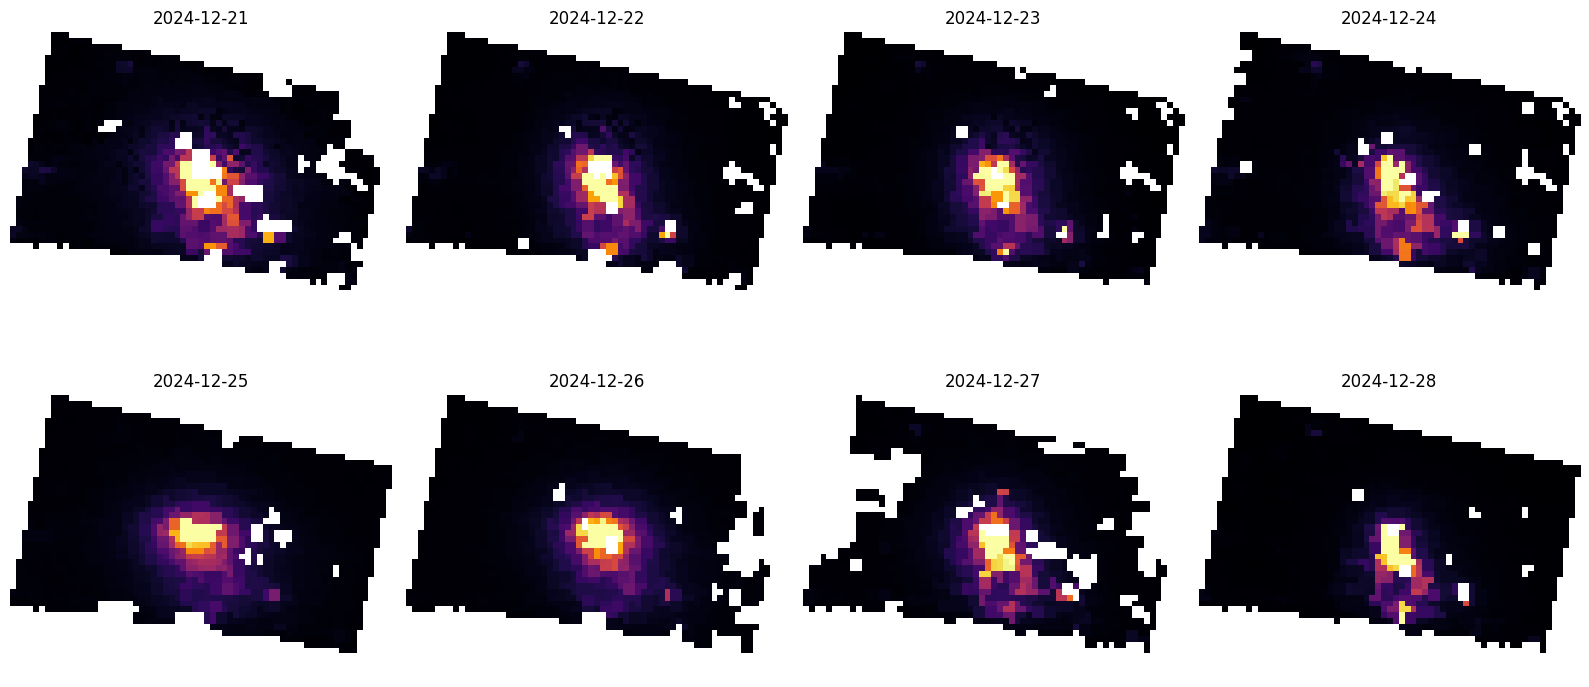

In [7]:
plot_xarray_time_comparison(bm_df, "Gap_Filled_DNB_BRDF-Corrected_NTL")

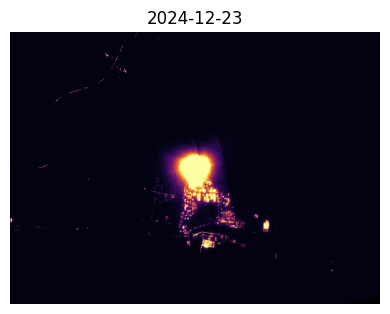

In [8]:
plot_xarray_time_comparison(sdgsat_df, "HDR")